# 1. Summary

### AI System can predict prices and get median of houses price based on some features eg , ... ##

# 2. Type of Data (Structured or Unstructured)

# 3.Data =>Catgorized or Uncategorized

###  (Supervised and Unsupervised) open page 14 

# 4.Bias or unbiased


###### Understand the Data: Begin by understanding the data you're working with. Look at the variables, their definitions, and how they were collected.

###### Data Cleaning (Check for Missing Values): Missing data can introduce bias, especially if it's not missing at random. Identify how missing values were handled and if it could introduce bias.

###### Examine Data Collection Methods: Review how the data was collected. Biases can arise from the way data was sampled or gathered. For example, if a survey was conducted only in urban areas, it may not represent rural populations.

###### Look for Sampling Bias: Check if the sample used is representative of the population. If certain groups are over- or under-represented, it can introduce bias.



# 5. Time Plan => prerequesties 

**understand the data**  => 30 mins
**Data Agumention** => 1 hour 
**Data cleaning** => 60 mins 
**Data Normilzation** => 70 mins 



# 6. Logo 

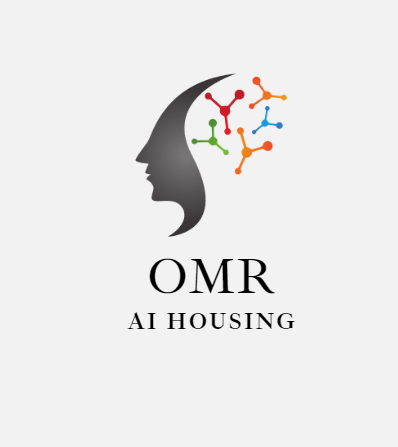

In [67]:
import pandas as pd 
import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
# from joblib

In [103]:
hs = pd.read_csv("housing.csv")
hs.head() ## page 23 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [106]:
hs["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [71]:
print(hs.duplicated().sum())
hs.drop_duplicates(inplace=True)
#hs.drop_duplicates(subset=['id'] , inplace=True)

0


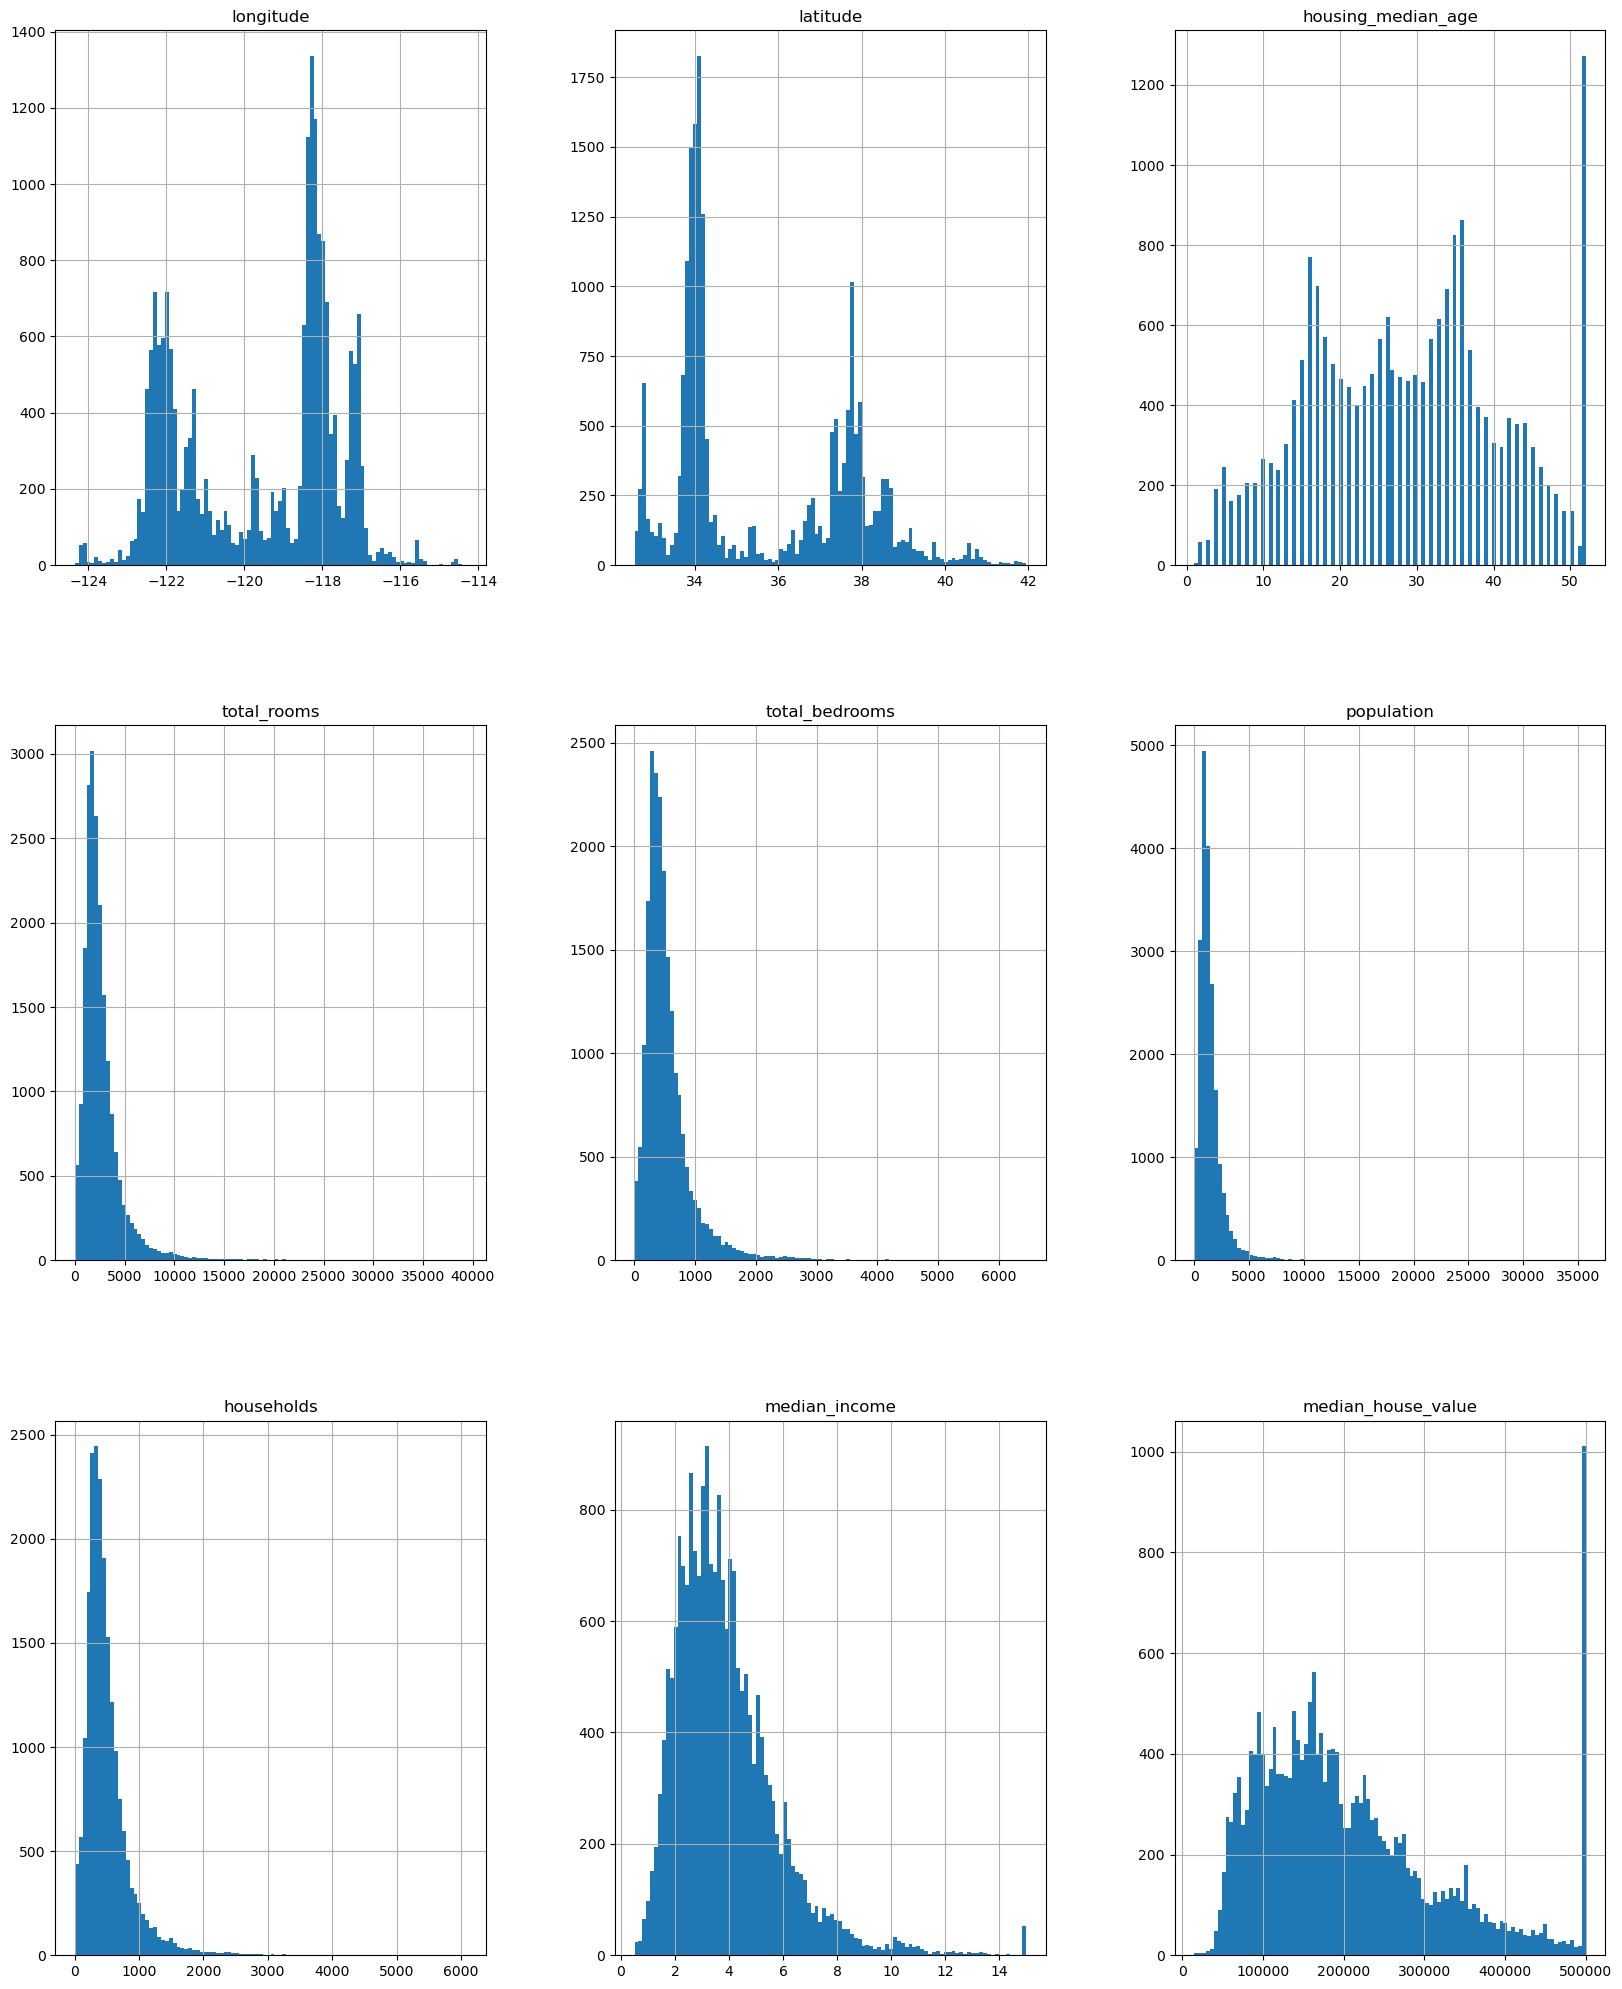

In [105]:
#graphical for data using hist page 21 
hs.hist(bins=50 , figsize=(20, 25))
plt.show()


In [73]:
#drop() , fillna()   page 29 
median = hs['total_bedrooms'].median()
hs["total_bedrooms"].fillna(median, inplace=True)

C:\Users\OMR\AppData\Local\Temp\ipykernel_2664\1440051999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hs["total_bedrooms"].fillna(median, inplace=True)


In [107]:
#label Encoding   page 30 

label_encoder = LabelEncoder()
data_copy = hs.copy()

data_copy['ocean_proximity'] = label_encoder.fit_transform(data_copy['ocean_proximity'])
data_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [87]:
#page 26 : 27 



X= data_copy.drop(["median_house_value"], axis=1) #Features
y= data_copy["median_house_value"].values  # Target Value

X_train , X_test , y_train , y_test= train_test_split(X , y , test_size= 0.2 , random_state=42)

# Supervised or Unsupervised Algorithms+ Cause Page 42 ,  43 

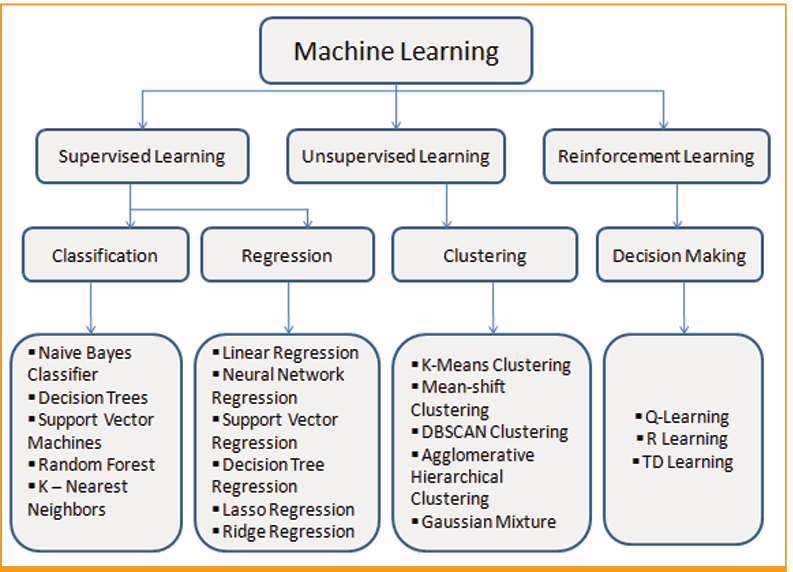

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
Y_predict = model.predict(X_test)
Y_predict

array([217974.2548896 , 155288.20837651, 205288.43412619, ...,
       312706.36261718, 122743.33376664, 195519.92393329])

In [100]:
mse = mean_squared_error(y_test, Y_predict)
mse



67986.41263249765


In [91]:
import joblib
joblib.dump(model , r"C:\Users\OMR\Desktop\hh1.h5")

['C:\\Users\\OMR\\Desktop\\housing.h5']

In [92]:
def predict_hosue_price(model, features):
    input_data = pd.DataFrame([features], columns=X.columns)
    predict_price = model.predict(input_data)
    return predict_price




In [108]:
user_input = {}
for column in X.columns:
    user_input[column] = int(input(f"Enter {column}: "))
predict_price = predict_hosue_price(model, user_input)
print('Predict Price for house is: ', predict_price[0])

Enter longitude: 122
Enter latitude: -123
Enter housing_median_age: 80
Enter total_rooms: 90
Enter total_bedrooms: 90
Enter population: 500
Enter households: 333
Enter median_income: 666
Enter ocean_proximity: 2
Predict Price for house is:  22850030.58907515
